In [3]:
loadOldTest = True
if loadOldTest:
    import os
    import pickle
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    def homePath(path):
        return os.path.join(os.path.expanduser("~"), path.strip("~/"))


    def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
        """
        Call in a loop to creay[x.index(num)]te terminal progress bar
        @params:
            iteration   - Required  : current iteration (Int)
            total       - Required  : total iterations (Int)
            prefix      - Optional  : prefix string (Str)
            suffix      - Optional  : suffix string (Str)
            decimals    - Optional  : positive number of decimals in percent complete (Int)
            length      - Optional  : character length of bar (Int)
            fill        - Optional  : bar fill character (Str)
            printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
        """
        percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
        filledLength = int(length * iteration // total)
        bar = fill * filledLength + '-' * (length - filledLength)
        print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
        # Print New Line on Complete
        if iteration == total: 
            print()



    #loading previous testingData
    testingDataVersion = "2023-10-17 18:59:54.067245"
    testingDataVersion = "2023-11-03_21-26-10-471833"
    testingDataVersion = "2023-11-06_10-41-16-568505"
    testingDataVersion = "2023-11-02_09-57-05-119241"
    testingDataVersion = "2024-02-13_12-33-14-841992"

    testingDataPath = homePath("~/SPGenerations/") + '/' + "testingData" + '/' + testingDataVersion
    combinedDF = pd.read_pickle(testingDataPath + '/combinedDF.pkl')


In [2]:
import os
newestModel = True #If this is set to true it will use the newest model in the models folder and ignore modelToTest
modelToTest = ''
threads = 16 #Number of threads to use for multithreaded tasks
pathToModelFolder = '/mnt/SPDrive/SPGenerations/Models' #Path to the models folder
pathToDataFolder = '~/SPDataset/S2DS129-1021DiffReposS245/' #Path to the data folder
#pathToDataFolder = '~/SPDataset/MiniTestingDataset'
#a folder inthe models folder contains the following files: model.h5, tokenizer.json commitHash.txt (For SCA-Tokenizer)
useCurrentSCATokenizer = '/home/mcall/SPGit/Model-Generation/SCA-Tokenizer' #If this is set to anything other than '' it will use the current SCA-Token in the SCA-Token folder and ignore the modelToTest

In [3]:
import os
import pickle
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import json
import threading as th
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import sys
import subprocess
import time
import datetime
import random
import math
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import tokenizer_from_json

catigoryInputModel = False


def homePath(path):
    if path[0] == '~':
        return os.path.join(os.path.expanduser("~"), path.strip("~/"))
    else:
        return path

pathToModelFolder = homePath(pathToModelFolder)
pathToDataFolder = homePath(pathToDataFolder)

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()


def searchFileName(path, fileName):
    filesToDo = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file == fileName:
                    filesToDo.append(os.path.join(root, file).split(path)[1])
    return filesToDo



2024-02-16 05:32:42.663732: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-16 05:32:42.699540: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 05:32:42.699563: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 05:32:42.699595: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 05:32:42.707165: I tensorflow/core/platform/cpu_feature_g

In [4]:
#File Loading


if newestModel:
    models = os.listdir(pathToModelFolder)
    models.sort()
    modelToTest = models[-1]
    print("Using newest model: " + modelToTest)
else:
    print("Using model: " + modelToTest)
model = load_model(pathToModelFolder + '/' +modelToTest + '/model.h5')
print (model.summary())

#load tokenizer from json that used the .tokenizer.save() function
with open(pathToModelFolder + '/' + modelToTest + '/tokenizer.json') as f:
    tokenizerModel = tokenizer_from_json(f.read())



#check if groupings are being used 
# check if GroupDict.npy exists
if os.path.isfile(pathToModelFolder + '/' + modelToTest + '/GroupDict.npy'):
    catigoryInputModel = True
    print("Using catigory input model")
    groupDict = np.load(pathToModelFolder + '/' + modelToTest + '/GroupDict.npy', allow_pickle=True).item()
    print(groupDict)


Using newest model: 2024-02-13_12-33-14-841992


2024-02-16 05:32:45.580401: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13173 MB memory:  -> device: 0, name: NVIDIA A2, pci bus id: 0000:11:00.0, compute capability: 8.6
2024-02-16 05:32:45.581301: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13173 MB memory:  -> device: 1, name: NVIDIA A2, pci bus id: 0000:b1:00.0, compute capability: 8.6
2024-02-16 05:32:46.721845: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 2048)         1638400   
                                                                 
 conv1d (Conv1D)             (None, 498, 2048)         12584960  
                                                                 
 global_max_pooling1d (Glob  (None, 2048)              0         
 alMaxPooling1D)                                                 
                                                                 
 reshape (Reshape)           (None, 1, 2048)           0         
                                                                 
 bidirectional (Bidirection  (None, 1, 2048)           25174016  
 al)                                                         

In [5]:
import sys
sys.path.append('./SCA-Tokenizer/')
sys.path.append('./TokenCatigoryGenerator')
import TokenizerManager
import TokenCatigoryApplier

dfTokens = TokenizerManager.tokenStart(pathToDataFolder, tokenizer=tokenizerModel, multiThreadProcessing = False)

if catigoryInputModel:
    dfCatigories = TokenCatigoryApplier.translateTokens(groupDict, dfTokens)
    print (dfCatigories)

completed folder index
Progressing (Not Multithreaded): |██████████████████████████████████████████████████| 100.0% Complete
Finishing
Tokenizing
["var1 1 = { ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit ' : ' strlit ' , ' strlit 

In [6]:
#Grading Code
sys.path.append('../Auto-Grader/')
import Grader
#prevent warnings from printing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
dfGrades = Grader.bootstrap(pathToDataFolder)

151095sing Files |█████████████████████████████████████████████████-| 99.2% Complete
        fileGrade                                         Path
0       47.400000  /3719392/tools/build_full_templates.py/0.py
1       48.452632  /3719392/tools/build_full_templates.py/1.py
2       52.505263  /3719392/tools/build_full_templates.py/2.py
3       50.557895  /3719392/tools/build_full_templates.py/3.py
4       51.610526  /3719392/tools/build_full_templates.py/4.py
...           ...                                          ...
151090  40.707692          /3719568/test/test_r_reader.py/8.py
151091  39.246154          /3719568/test/test_r_reader.py/9.py
151092  40.784615         /3719568/test/test_r_reader.py/10.py
151093  39.323077         /3719568/test/test_r_reader.py/11.py
151094  40.861538         /3719568/test/test_r_reader.py/12.py

[151095 rows x 2 columns]
Specific Hashes Downgraded: 315
Other downgrades: 2622
Time Taken: 21.92602849006653


In [7]:
combinedDF = pd.merge(dfGrades, dfTokens, on = "Path")
if catigoryInputModel:
    combinedDF = pd.merge(combinedDF, dfCatigories, on = "Path")


In [8]:
#get max length of tokens from model
#maxLen = model.layers[0].input_shape[1]
maxLen = 500

combinedDF = combinedDF[combinedDF["tokenCode"].apply(lambda x: len(x)) <= maxLen]
#reset index
combinedDF = combinedDF.reset_index(drop=True)
#Pad the sequences
combinedDF["tokenCode"] = pad_sequences(combinedDF["tokenCode"], maxlen = maxLen, padding = "post", truncating = "post").tolist()

if catigoryInputModel:
    combinedDF["tokenGroupCode"] = pad_sequences(combinedDF["tokenGroupCode"], maxlen = maxLen, padding = "post", truncating = "post").tolist()

In [9]:

#add new colum to combinedDF for the model prediction
combinedDF["predictedGrade"] = None
showMessage = True


"""
    for i, row in combinedDF.iterrows():
        if combinedDF["predictedGrade"][i] == None:
            combinedDF.loc[i, "predictedGrade"] = model.predict(np.array(row["tokenCode"]).reshape(1, -1))
            if showMessage:
                printProgressBar(i, len(combinedDF), prefix = 'Progress:', suffix = 'Complete', length = 50)
            print(np.array(np.array(row["tokenCode"]).reshape(1, -1)))
            break
"""
    #INSTEAD OF ITTERATING FEED THE WHOLE LIST
combinedDF["predictedGrade"] = model.predict(np.array(combinedDF["tokenCode"].tolist()))


#make dir if it doesn't exist
if not os.path.exists(homePath("~/SPGenerations/") + '/' + "testingData" + '/' + modelToTest):
    os.makedirs(homePath("~/SPGenerations/") + '/' + "testingData" + '/' + modelToTest)



combinedDF.to_pickle(homePath("~/SPGenerations/") + '/' + "testingData" + '/' + modelToTest + '/combinedDF.pkl')
dataSetVersion = pathToDataFolder

#write that to a file
with open(homePath("~/SPGenerations/") + '/' + "testingData" + '/' + modelToTest + '/dataSetVersion.txt', 'w') as file:
    file.write(dataSetVersion)
    
        



2024-02-16 06:08:52.965236: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-02-16 06:08:53.608915: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 450/1059 [===========>..................] - ETA: 39s

1059/1059 [==============================] - 75s 66ms/step


In [4]:
#check accuracy
correct = 0
total = 0


def getGradeRange(rangeofCorrect):
    correct = 0
    total = 0
    for i in combinedDF.index:
        if (combinedDF.at[i, "predictedGrade"] <= combinedDF.at[i, "fileGrade"] + rangeofCorrect and combinedDF.at[i, "predictedGrade"] >= combinedDF.at[i, "fileGrade"] - rangeofCorrect):
            correct += 1
        total += 1
    return correct, total



#generate a graph
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 25, 1)
y = []
for i in x:
    correct, total = getGradeRange(i)
    y.append(correct/total)
plt.plot(x, y)
plt.xlabel('Range of Correct')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Range of Correct')
plt.show()




KeyboardInterrupt: 

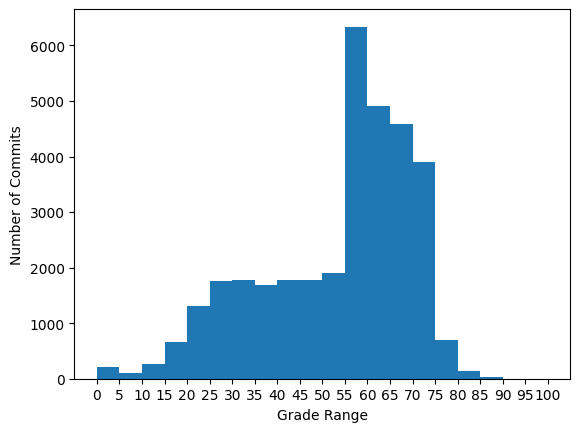

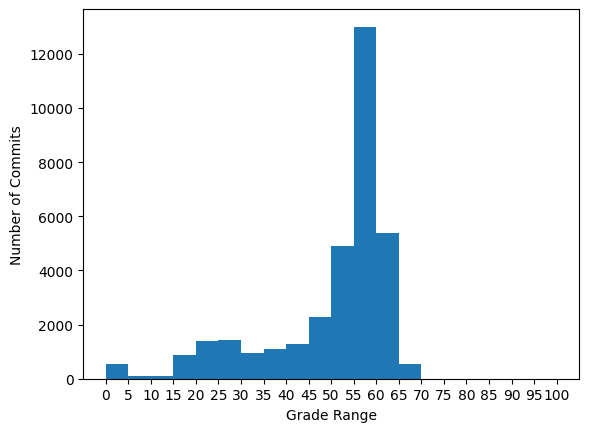

In [6]:
#generate graph showing range of grades
graph = plt.hist(combinedDF['fileGrade'], bins=20, range=(0, 100))
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.xlabel("Grade Range")
plt.ylabel("Number of Commits")
plt.show()

graph = plt.hist(combinedDF['predictedGrade'], bins=20, range=(0, 100))
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.xlabel("Grade Range")
plt.ylabel("Number of Commits")
plt.show()

In [12]:
incriments = 20
rangeofCorrect = 5

#break up the data into incriments
for i in range(incriments):
    #get the data for the incriments
    incrimentsDF = combinedDF[(combinedDF["fileGrade"] >= i * 100 / incriments) & (combinedDF["fileGrade"] < (i + 1) * 100 / incriments)]
    #get the accuracy for the incriments
    correct = 0
    total = 0
    for j in incrimentsDF.index:
        if (incrimentsDF.at[j, "predictedGrade"] <= incrimentsDF.at[j, "fileGrade"] + rangeofCorrect and incrimentsDF.at[j, "predictedGrade"] >= incrimentsDF.at[j, "fileGrade"] - rangeofCorrect):
            correct += 1
        total += 1
    #print the accuracy
    if(total != 0):
        print ("Accuracy for incriments " + str(i * 100 / incriments) + "% - " + str((i + 1) * 100 / incriments) + "%: " + str(correct/total * 100) + "%")


Accuracy for incriments 0.0% - 5.0%: 0.4830917874396135%
Accuracy for incriments 5.0% - 10.0%: 0.0%
Accuracy for incriments 10.0% - 15.0%: 1.5444015444015444%
Accuracy for incriments 15.0% - 20.0%: 6.495468277945619%
Accuracy for incriments 20.0% - 25.0%: 7.856598016781083%
Accuracy for incriments 25.0% - 30.0%: 7.438955139125497%
Accuracy for incriments 30.0% - 35.0%: 4.619718309859155%
Accuracy for incriments 35.0% - 40.0%: 4.71976401179941%
Accuracy for incriments 40.0% - 45.0%: 8.55374226223973%
Accuracy for incriments 45.0% - 50.0%: 16.55367231638418%
Accuracy for incriments 50.0% - 55.0%: 36.94736842105264%
Accuracy for incriments 55.0% - 60.0%: 52.90312401388451%
Accuracy for incriments 60.0% - 65.0%: 33.98572884811417%
Accuracy for incriments 65.0% - 70.0%: 8.997597728761738%
Accuracy for incriments 70.0% - 75.0%: 0.46094750320102434%
Accuracy for incriments 75.0% - 80.0%: 0.0%
Accuracy for incriments 80.0% - 85.0%: 0.0%
Accuracy for incriments 85.0% - 90.0%: 0.0%
Accuracy for 

In [13]:
#comparitive commits tests

#Make an array of dataframes which are created from combinedDF, and are split by their original file

#Get the list of files
files = combinedDF["Path"]


#split all the files by the last / and get the first element of the split

files = [file.rsplit("/",1)[0] for file in files]
#remove duplicates
files = list(dict.fromkeys(files))

#reset index

#make an array of dataframes
dataframes = []
for i in range(len(files)):
    dataframes.append([])
for i in combinedDF.index:
    #get index of files where the file name is the same as the current file name
    index = files.index(combinedDF.at[i, "Path"].rsplit("/",1)[0])
    dataframes[index].append(combinedDF.iloc[i])

In [10]:
#per file commit simple test, checks if the previous commit is less than or equal to the current commit
correct = 0
equal = 0
total = 0
for dataframe in dataframes:
    for i in range(1, len(dataframe)):
        #make sure that the length of the dataframe is greater than 1
        if (dataframe[i]["predictedGrade"] > dataframe[i - 1]["predictedGrade"]):
            correct += 1
            total += 1
        elif (dataframe[i]["predictedGrade"] == dataframe[i - 1]["predictedGrade"]):
            equal += 1
        else:
            total += 1
print ("Accuracy for per commit simple test: " + str(correct/total * 100) + "%")

Accuracy for per commit simple test: 50.22354694485842%


Average correct score: 5.095443505325846
Average incorrect score: -4.464458077182313
Accuracy for per file commit gap test of size 1 : 50.22354694485842%
Average correct score: 5.720049829551771
Average incorrect score: -4.805633100738452
Accuracy for per file commit gap test of size 2 : 50.81614778246676%
Average correct score: 6.242962882625326
Average incorrect score: -5.17087349616246
Accuracy for per file commit gap test of size 3 : 51.8309186435281%
Average correct score: 6.628608652016408
Average incorrect score: -5.505911083871429
Accuracy for per file commit gap test of size 4 : 52.648083623693374%
Average correct score: 7.107409775909142
Average incorrect score: -5.700304482865723
Accuracy for per file commit gap test of size 5 : 53.2650190878039%
Average correct score: 7.45099563117186
Average incorrect score: -6.049619894270646
Accuracy for per file commit gap test of size 6 : 54.37448896156991%
Average correct score: 7.857255628066404
Average incorrect score: -6.2267599254

ValueError: x and y must have same first dimension, but have shapes (49,) and (0,)

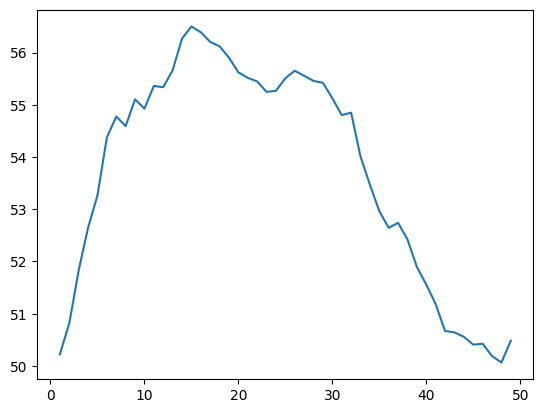

In [9]:
#per file commit gap test, however we just keep track of the average score of the correct and incorrect predictions
avgIncorrectScoreArray = []    
avgCorrectScoreArray = []
def gapTest(gap):
    correct = 0
    equal = 0
    incorrect = 0 
    total = 0
    avgCorrectScore = 0

    avgIncorrectScore = 0
 
    for dataframe in dataframes:
        for i in range(gap, len(dataframe)):
            #make sure that the length of the dataframe is greater than 1
            if (dataframe[i]["predictedGrade"] > dataframe[i - gap]["predictedGrade"]):
                correct += 1
                avgCorrectScore += dataframe[i]["predictedGrade"] - dataframe[i - gap]["predictedGrade"]
                total += 1
            elif (dataframe[i]["predictedGrade"] == dataframe[i - gap]["predictedGrade"]):
                equal += 1
            else:
                avgIncorrectScore += dataframe[i]["predictedGrade"] - dataframe[i - gap]["predictedGrade"]
                incorrect += 1
                total += 1
    if (total != 0):
        avgCorrectScore /= correct
        avgIncorrectScore /= incorrect
        print ("Average correct score: " + str(avgCorrectScore))
        print ("Average incorrect score: " + str(avgIncorrectScore))
        avgCorrectScoreArray.append(avgCorrectScore)
        avgIncorrectScoreArray.append(avgIncorrectScore)


    print ("Accuracy for per file commit gap test of size " + str(gap) + " : " + str(correct/total * 100) + "%")

    return correct/total * 100, equal/total * 100, incorrect/total * 100



#graph this
x = []
positive = []
neutral = []
negative = []
for i in range(1, 50):
    gapTestResults = gapTest(i)
    x.append(i)
    positive.append(gapTestResults[0])
    negative.append(gapTestResults[2])
plt.plot(x, positive, label = "Positive")
plt.plot(x, neutral, label = "Inconclusive")
plt.plot(x, negative, label = "Negative")
plt.xlabel("Gap Size")
plt.ylabel("Accuracy")
plt.title("Accuracy as Gap Size Increases")
plt.legend()
plt.show()

#graph the average correct and incorrect scores
x = []
y = []
z = []
middle = []
#untitled line at 50, small thickness
plt.plot([-1,50], [0,0], color = "black", linewidth = 0.6)
#keep view in 0-50
plt.xlim(0, 50)
for i in range(0, 50):
    x.append(i)
    y.append(avgCorrectScoreArray[i-1])
    z.append(avgIncorrectScoreArray[i-1])
    middle.append((avgCorrectScoreArray[i-1] + avgIncorrectScoreArray[i-1])/2)
plt.plot(x, y, label = "Average Correct Score")
plt.plot(x, z, label = "Average Incorrect Score")
plt.plot(x, middle, label = "Delta")
#lable the value of the delta every 10
for i in range(0, 50, 10):
    plt.text(i, middle[i]+.5, str(round((middle[i]),2)))
    plt.plot([i, i], [0, middle[i]], color = "black", linewidth = 0.6)

plt.xlabel("Gap Size")
plt.ylabel("Average Score")
plt.title("Average Score as Gap Size Increases")
plt.legend()
plt.show()


Average correct score: 5.932769085943084
Average incorrect score: -5.408533250060037
Accuracy for per file commit gap test of size 1 : 21.155943293347875%
3668
Average correct score: 6.044372980341767
Average incorrect score: -5.496167352250001
Accuracy for per file commit gap test of size 2 : 30.83211678832117%
3425
Average correct score: 6.413999029376252
Average incorrect score: -5.636356054920039
Accuracy for per file commit gap test of size 3 : 36.00874453466583%
3202
Average correct score: 6.515449997988326
Average incorrect score: -6.068020896198276
Accuracy for per file commit gap test of size 4 : 39.95350381932913%
3011
Average correct score: 6.993847365431215
Average incorrect score: -6.088595527146883
Accuracy for per file commit gap test of size 5 : 42.21294363256785%
2395
Average correct score: 7.2587523827614
Average incorrect score: -6.41302305451997
Accuracy for per file commit gap test of size 6 : 44.82217573221757%
1912
Average correct score: 7.5801376947381875
Averag

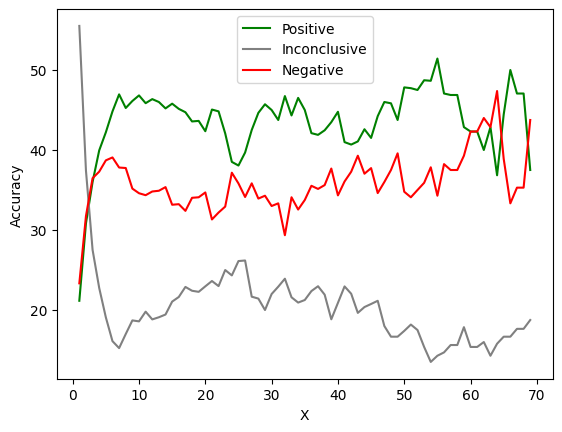

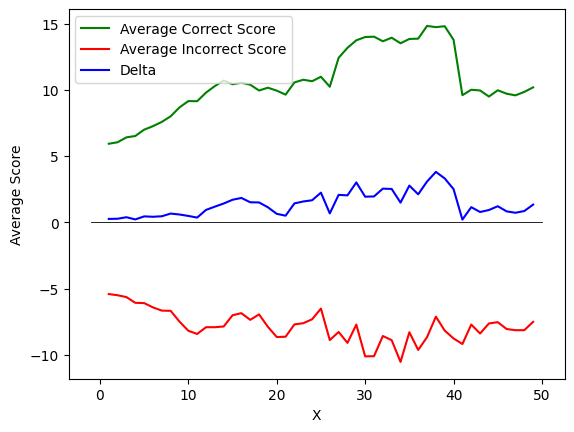

In [22]:
#per file commit gap test, however we just keep track of the average score of the correct and incorrect predictions
avgIncorrectScoreArray = []    
avgCorrectScoreArray = []
def notGapTest(gap):
    correct = 0
    equal = 0
    incorrect = 0 
    total = 0
    avgCorrectScore = 0

    avgIncorrectScore = 0
 
    for dataframe in dataframes:
            if len(dataframe) < gap+1:
                continue
            if (dataframe[0]["predictedGrade"] < dataframe[gap]["predictedGrade"]):
                correct += 1
                avgCorrectScore += dataframe[gap]["predictedGrade"] - dataframe[0]["predictedGrade"]
                total += 1
            elif (dataframe[0]["predictedGrade"] == dataframe[gap]["predictedGrade"]):
                equal += 1
                total += 1
            else:
                avgIncorrectScore += - dataframe[0]["predictedGrade"] + dataframe[gap]["predictedGrade"]
                incorrect += 1
                total += 1
    if (total != 0 and correct != 0 and incorrect != 0): 
        avgCorrectScore /= correct
        avgIncorrectScore /= incorrect
        print ("Average correct score: " + str(avgCorrectScore))
        print ("Average incorrect score: " + str(avgIncorrectScore))
        avgCorrectScoreArray.append(avgCorrectScore)
        avgIncorrectScoreArray.append(avgIncorrectScore)


    print ("Accuracy for per file commit gap test of size " + str(gap) + " : " + str(correct/total * 100) + "%")

    return correct/total * 100, equal/total * 100, incorrect/total * 100, total

def gapTest(gap):
    correct = 0
    equal = 0
    incorrect = 0 
    total = 0
    avgCorrectScore = 0

    avgIncorrectScore = 0
 
    for dataframe in dataframes:
        for i in range(gap, len(dataframe)):
            #make sure that the length of the dataframe is greater than 1
            if (dataframe[i]["predictedGrade"] > dataframe[i - gap]["predictedGrade"]):
                correct += 1
                avgCorrectScore += dataframe[i]["predictedGrade"] - dataframe[i - gap]["predictedGrade"]
                total += 1
            elif (dataframe[i]["predictedGrade"] == dataframe[i - gap]["predictedGrade"]):
                equal += 1
                total += 1
            else:
                avgIncorrectScore += dataframe[i]["predictedGrade"] - dataframe[i - gap]["predictedGrade"]
                incorrect += 1
                total += 1
    if (total != 0):
        avgCorrectScore /= correct
        avgIncorrectScore /= incorrect
        print ("Average correct score: " + str(avgCorrectScore))
        print ("Average incorrect score: " + str(avgIncorrectScore))
        avgCorrectScoreArray.append(avgCorrectScore)
        avgIncorrectScoreArray.append(avgIncorrectScore)


    print ("Accuracy for per file commit gap test of size " + str(gap) + " : " + str(correct/total * 100) + "%")

    return correct/total * 100, equal/total * 100, incorrect/total * 100, total



#graph this
x = []
positive = []
neutral = []
negative = []
for i in range(1, 70):
    gapTestResults = notGapTest(i)
    x.append(i)
    positive.append(gapTestResults[0])
    negative.append(gapTestResults[2])
    neutral.append(gapTestResults[1])
    print(gapTestResults[3])

plt.plot(x, positive, label = "Positive", color = "green")
plt.plot(x, neutral, label = "Inconclusive", color = "grey")
plt.plot(x, negative, label = "Negative", color = "red")
plt.xlabel("X")
plt.ylabel("Accuracy")
#plt.title("Initial Commit Score vs Score at X Gap Size")
plt.legend()
plt.show()

#graph the average correct and incorrect scores
x = []
y = []
z = []
middle = []
for i in range(1, 50):
    x.append(i)
    y.append(avgCorrectScoreArray[i-1])
    z.append(avgIncorrectScoreArray[i-1])
    middle.append((avgCorrectScoreArray[i-1] + avgIncorrectScoreArray[i-1])/2)
plt.plot(x, y, label = "Average Correct Score", color = "green")
plt.plot(x, z, label = "Average Incorrect Score", color = "red")
plt.plot(x, middle, label = "Delta", color = "blue")
plt.plot([-1,50], [0,0], color = "black", linewidth = 0.6)
plt.xlabel("X")
plt.ylabel("Average Score")
#plt.title("Average Initial Score vs Average Score at X Gap Size")
plt.legend()
plt.show()


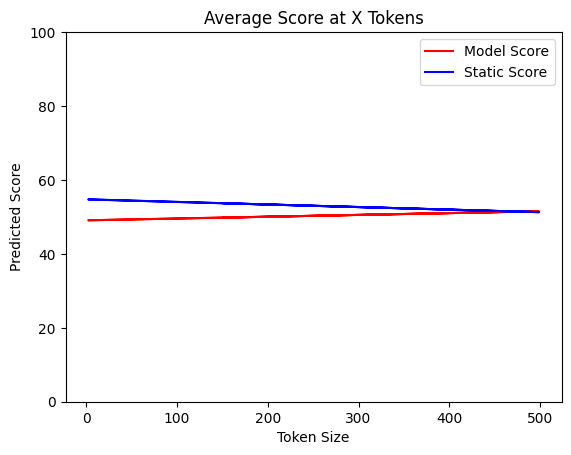

Standard Deviation of predicted scores:  16.63537098815292
Quantiles of predicted scores:  [41.95490196 57.44088624 65.73170732]
[44.666666666666664, 46.0, 71.0, 71.33333333333333, 58.07692307692308, 59.61538461538461, 61.15384615384615, 62.69230769230769, 70.23076923076923, 61.0, 61.0, 60.857142857142854, 60.714285714285715, 69.42857142857143, 75.14285714285714, 64.66666666666667, 76.46153846153847, 73.94117647058823, 55.0, 70.0, 72.77777777777777, 67.0, 67.0, 71.36363636363636, 55.0, 68.33333333333333, 73.55555555555556, 68.9090909090909, 80.39393939393939, 55.0, 65.0, 75.0, 70.0, 55.0, 59.53846153846154, 58.0, 64.33333333333333, 62.58620689655172, 63.275862068965516, 55.0, 57.857142857142854, 66.42857142857143, 61.08695652173913, 68.91304347826087, 71.0, 55.0, 59.0, 63.0, 56.03448275862069, 56.206896551724135, 61.03448275862069, 61.206896551724135, 61.37931034482759, 61.55172413793103, 72.77777777777777, 56.904761904761905, 55.0, 60.5, 60.0, 62.5, 72.5, 76.33333333333333, 58.5555555

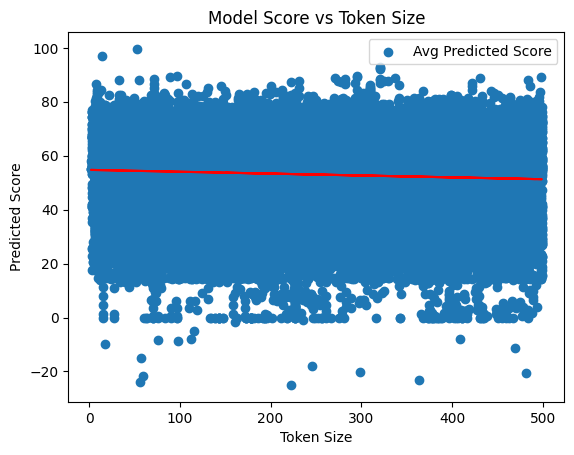

[       fileGrade                                  Path  \
0      47.400000   /3719392/tools/my_variables.py/0.py   
1      48.650000   /3719392/tools/my_variables.py/1.py   
2      49.900000   /3719392/tools/my_variables.py/2.py   
3      54.150000   /3719392/tools/my_variables.py/3.py   
4      58.400000   /3719392/tools/my_variables.py/4.py   
...          ...                                   ...   
33859  40.707692   /3719568/test/test_r_reader.py/8.py   
33860  39.246154   /3719568/test/test_r_reader.py/9.py   
33861  40.784615  /3719568/test/test_r_reader.py/10.py   
33862  39.323077  /3719568/test/test_r_reader.py/11.py   
33863  40.861538  /3719568/test/test_r_reader.py/12.py   

                                               tokenCode  predictedGrade  
0      [22, 9, 22, 4, 24, 10, 38, 3, 9, 3, 11, 3, 9, ...        1.585028  
1      [22, 9, 22, 4, 24, 10, 38, 3, 9, 3, 11, 3, 9, ...        1.585028  
2      [4, 24, 10, 38, 3, 9, 3, 11, 3, 9, 3, 6, 3, 9,...        5.004368  
3 

In [26]:
#Average Score vs token size
x = []
y = []
z = []
for code in combinedDF.iterrows():
    y.append((np.mean(code[1]["predictedGrade"])))
    z.append((np.mean(code[1]["fileGrade"])))
    #how many tokens before a 0
    for i in range(len(code[1]["tokenCode"])):
        if code[1]["tokenCode"][i] == 0 or i == len(code[1]["tokenCode"])-1:
            x.append(i)
            break
    
sigma1 = np.std(y)
sigma2 = np.std(z)
#make a best fit line with sd
alpha = np.polyfit(x, y, 1)
alpha = np.poly1d(alpha)
beta = np.polyfit(x, z, 1)
beta = np.poly1d(beta)
#show from 0 to 100
plt.ylim(0, 100)


plt.plot(x, alpha(x), color='red')
plt.plot(x, beta(x), color='blue')

plt.xlabel("Token Size")
plt.ylabel("Predicted Score")
plt.title("Average Score at X Tokens")
plt.legend(["Model Score", "Static Score"])
plt.show()

#get the standard deviation of the predicted scores
print("Standard Deviation of predicted scores: ", sigma2)
print("Quantiles of predicted scores: ", np.quantile(z, [0.25, 0.5, 0.75]))
#get the standard deviation at 500 tokens
scoresAt500 = []
for num in range(len(x)):
    if x[num] > 450:
            scoresAt500.append(z[num-1])
print(scoresAt500)
print("Standard Deviation of predicted scores at 499 tokens: ", np.std(scoresAt500))
print("Quantiles of predicted scores at 499 tokens: ", np.quantile(scoresAt500, [0.25, 0.5, 0.75]))


#Average Score vs token size
x = []
y = []
for code in combinedDF.iterrows():
    y.append((np.mean(code[1]["fileGrade"])))
    #how many tokens before a 0
    for i in range(len(code[1]["tokenCode"])):
        if code[1]["tokenCode"][i] == 0 or i == len(code[1]["tokenCode"])-1:
            x.append(i)
            break
    

#make a best fit line with sd
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(x, y)

plt.plot(x, p(x), color='red')

plt.xlabel("Token Size")
plt.ylabel("Predicted Score")
plt.title("Model Score vs Token Size")
plt.legend(["Avg Predicted Score"])
plt.show()





print ([combinedDF])